<a href="https://colab.research.google.com/github/cglnrdgn/Sentiment_Analysis_With_Machine_Learning/blob/main/Yapay_Sinir_A%C4%9Flar%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/veri_final')

In [ ]:
!pwd

/content/drive/My Drive/Colab Notebooks/veri_final


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# Eğitim ve test veri setlerini yükleme
train_set = pd.read_json('train_set.json')
train_set


,review_id,movie,rating,review_detail,positive_word_count,negative_word_count
0,rw1133942,Kill Bill: Vol. 2 (2004),8,"After seeing Tarantino's Kill Bill Vol: 1, I g...",35,6
1,rw1133948,Win a Date with Tad Hamilton! (2004),3,This IS a film that has been done too many tim...,36,3
2,rw1133949,Saturday Night Live: The Best of Chris Farley ...,10,Chris Farley is one of my favorite comedians a...,31,3
3,rw1133950,Outlaw Star (1998– ),10,"I love this anime series, my only complaint is...",69,9
4,rw1133952,The Aviator (2004),10,****Excellent ***Good **Fair *Poor Before watc...,53,2
...,...,...,...,...,...,...
205,rw1134216,The Devil's Rejects (2005),7,...that goes without saying that it isn't by a...,191,26
206,rw1134217,Bad News Bears (2005),8,Billy Bob Thornton pulled off what no one othe...,76,18
207,rw1134219,The Island (2005),8,So Bay bashers are most likely to find little ...,139,22
208,rw1134222,The Island (2005),7,As a first-time outing without the overadrenal...,93,9


In [ ]:
test_set = pd.read_json('test_set.json')
test_set

,review_id,movie,rating,review_detail,positive_word_count,negative_word_count
0,rw1240859,Birth (2004),10,I've been hooked on Glazer since 'Karma Police...,19,8
1,rw1240860,Mr. & Mrs. Smith (2005),9,Do you like Angelina Jolie? How about Brad Pit...,42,3
2,rw1240861,Fist of the North Star (1995),4,I'll start with quoting other reviews I've don...,76,16
3,rw1240862,Blind Horizon (2003),7,A good thriller is one that makes you wonder a...,61,8
4,rw1240863,Intergirl (1989),10,One of best post-perestroika Russian movies. A...,61,15
...,...,...,...,...,...,...
128,rw1241034,Memoirs of a Geisha (2005),5,"I was quite impressed with the costuming, the ...",31,2
129,rw1241035,Band of Brothers (2001),10,I was initially put off by the fact David Schw...,28,4
130,rw1241036,Road Lawyers and Other Briefs (1990),10,"This ""cult classic"" contained four short films...",30,4
131,rw1241038,The Exorcism of Emily Rose (2005),6,I went to the midnight showing of this movie a...,48,7


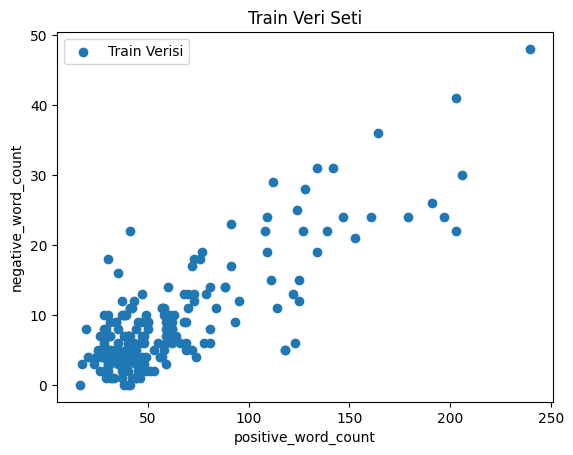

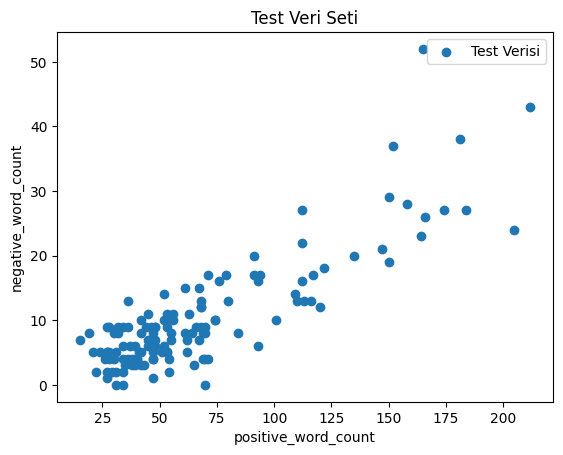

In [ ]:
# Veriyi hazırlama
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_set[['positive_word_count', 'negative_word_count']])
y_train = train_set['rating']
X_test = scaler.transform(test_set[['positive_word_count', 'negative_word_count']])
y_test = test_set['rating']


# Train setini görselleştirme
plt.scatter(train_set['positive_word_count'], train_set['negative_word_count'], label='Train Verisi')
plt.xlabel('positive_word_count')
plt.ylabel('negative_word_count')
plt.title('Train Veri Seti')
plt.legend()
plt.show()


# Test setini görselleştirme
plt.scatter(test_set['positive_word_count'], test_set['negative_word_count'], label='Test Verisi')
plt.xlabel('positive_word_count')
plt.ylabel('negative_word_count')
plt.title('Test Veri Seti')
plt.legend()
plt.show()



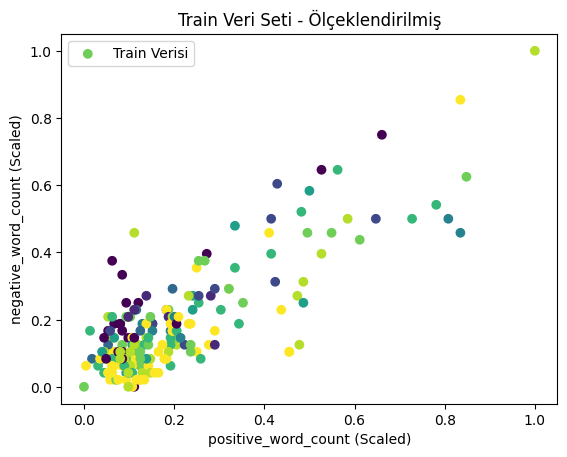

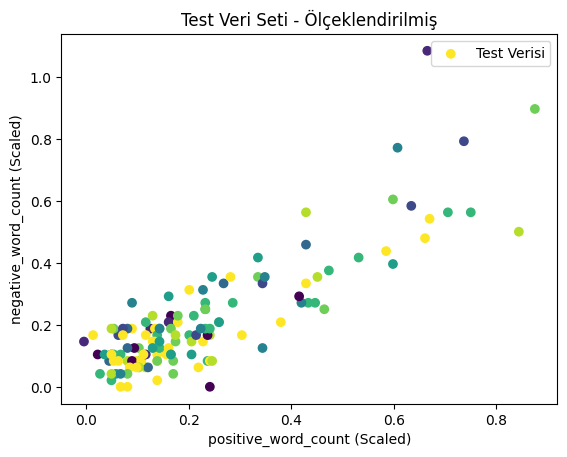

In [ ]:
# Train seti Ölçeklendirilmiş verileri
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, label='Train Verisi')
plt.xlabel('positive_word_count (Scaled)')
plt.ylabel('negative_word_count (Scaled)')
plt.title('Train Veri Seti - Ölçeklendirilmiş')
plt.legend()
plt.show()

# Test seti Ölçeklendirilmiş verileri
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label='Test Verisi')
plt.xlabel('positive_word_count (Scaled)')
plt.ylabel('negative_word_count (Scaled)')
plt.title('Test Veri Seti - Ölçeklendirilmiş')
plt.legend()
plt.show()


In [ ]:
X_train

array([[0.08482143, 0.125     ],
       [0.08928571, 0.0625    ],
       [0.06696429, 0.0625    ],
       [0.23660714, 0.1875    ],
       [0.16517857, 0.04166667],
       [0.05357143, 0.20833333],
       [0.18303571, 0.22916667],
       [0.11160714, 0.10416667],
       [0.24107143, 0.27083333],
       [0.06696429, 0.1875    ],
       [0.12053571, 0.25      ],
       [0.42857143, 0.60416667],
       [0.0625    , 0.20833333],
       [0.17857143, 0.08333333],
       [0.33482143, 0.47916667],
       [0.47321429, 0.27083333],
       [0.80803571, 0.5       ],
       [0.125     , 0.0625    ],
       [0.5       , 0.58333333],
       [0.06696429, 0.02083333],
       [0.10267857, 0.08333333],
       [0.01785714, 0.08333333],
       [0.0625    , 0.14583333],
       [0.0625    , 0.10416667],
       [0.32142857, 0.29166667],
       [0.12946429, 0.1875    ],
       [0.10267857, 0.10416667],
       [0.52678571, 0.39583333],
       [0.09821429, 0.08333333],
       [0.1875    , 0.22916667],
       [0.

In [ ]:
X_test

array([[ 0.01339286,  0.16666667],
       [ 0.11607143,  0.0625    ],
       [ 0.26785714,  0.33333333],
       [ 0.20089286,  0.16666667],
       [ 0.20089286,  0.3125    ],
       [ 0.75      ,  0.5625    ],
       [ 0.20982143,  0.22916667],
       [ 0.06696429,  0.        ],
       [ 0.23660714,  0.08333333],
       [ 0.10267857,  0.08333333],
       [ 0.125     ,  0.1875    ],
       [ 0.23214286,  0.25      ],
       [ 0.16071429,  0.29166667],
       [ 0.04910714,  0.02083333],
       [ 0.16517857,  0.20833333],
       [ 0.0625    ,  0.16666667],
       [ 0.70535714,  0.5625    ],
       [ 0.30357143,  0.16666667],
       [ 0.06696429,  0.10416667],
       [ 0.10267857,  0.125     ],
       [ 0.22767857,  0.3125    ],
       [ 0.08035714,  0.08333333],
       [ 0.09821429,  0.08333333],
       [ 0.16517857,  0.22916667],
       [ 0.875     ,  0.89583333],
       [ 0.14285714,  0.1875    ],
       [ 0.04464286,  0.08333333],
       [ 0.12053571,  0.0625    ],
       [ 0.33482143,

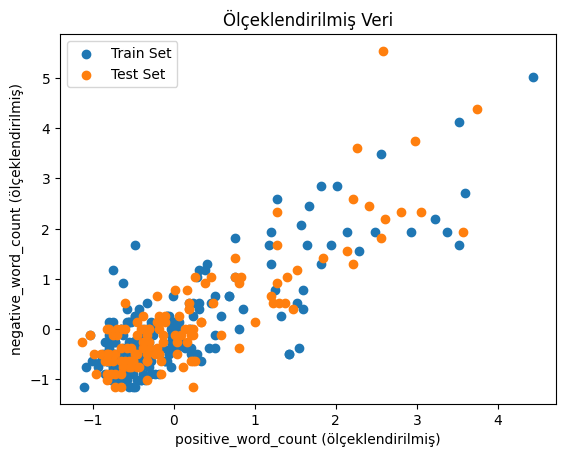

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(train_set[['positive_word_count', 'negative_word_count']])
y_train = train_set['rating']
X_test = scaler.transform(test_set[['positive_word_count', 'negative_word_count']])
y_test = test_set['rating']

# Ölçeklendirilmiş verileri görselleştirme
plt.scatter(X_train[:, 0], X_train[:, 1], label='Train Set')
plt.scatter(X_test[:, 0], X_test[:, 1], label='Test Set')
plt.xlabel('positive_word_count (ölçeklendirilmiş)')
plt.ylabel('negative_word_count (ölçeklendirilmiş)')
plt.title('Ölçeklendirilmiş Veri')
plt.legend()
plt.show()

In [ ]:
# Yapay sinir ağıyla eğitim
model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', random_state=42)
model.fit(X_train, y_train)

# Test setinde tahmin yapma
y_pred = model.predict(X_test)
pred_with_datas=test_set.copy()
pred_with_datas['prediction']=y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy: 0.8120300751879699
precision: 0.9907407407407407
recall: 0.816793893129771


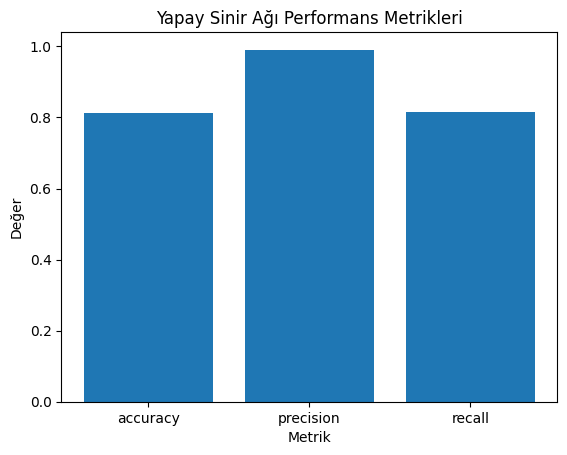

In [ ]:
# Modelin performansını değerlendirme
def calculate_metrics(dataframe):
  tp = 0
  fp = 0
  tn = 0
  fn = 0
  for index in dataframe.index:
    rating = dataframe['rating'][index]
    prediction = dataframe['prediction'][index]
    if rating > 4 and rating <= 10:
      if prediction > 4 and prediction <= 10:
        tp += 1
      else:
        fp += 1
    elif rating <= 5 and rating >= 0:
      if prediction <= 5 and prediction >= 0:
        tn += 1
      else:
        fn += 1
  return tp, fp, tn, fn

tp, fp, tn, fn  = calculate_metrics(pred_with_datas)
accuracy = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
recall =  tp / (tp + fn)

print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")

# Performans metriklerini görselleştirme
metrikler = ['accuracy', 'precision', 'recall']
değerler = [accuracy, precision, recall]

plt.bar(metrikler, değerler)
plt.xlabel('Metrik')
plt.ylabel('Değer')
plt.title('Yapay Sinir Ağı Performans Metrikleri')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

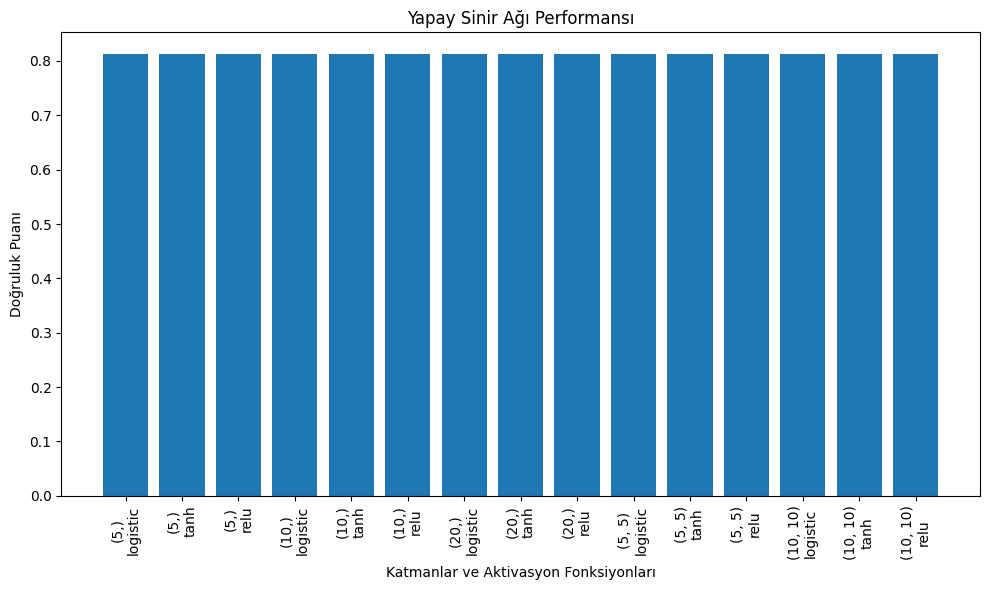

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# Eğitim ve test veri setlerini yükleme
train_set = pd.read_json('train_set.json')
test_set = pd.read_json('test_set.json')

# Veriyi hazırlama
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_set[['positive_word_count', 'negative_word_count']])
y_train = train_set['rating']
X_test = scaler.transform(test_set[['positive_word_count', 'negative_word_count']])
y_test = test_set['rating']

# Katman sayılarını ve aktivasyon fonksiyonlarını tanımlama
hidden_layers = [(5,), (10,), (20,), (5, 5), (10, 10)]
activations = ['logistic', 'tanh', 'relu']

# Performans metriklerini saklamak için listeler
accuracy_scores = []

# Her kombinasyon için yapay sinir ağı modelini eğitme ve performansı değerlendirme
for hidden_layer in hidden_layers:

    for activation in activations:

        # Yapay sinir ağıyla eğitim
        model = MLPClassifier(hidden_layer_sizes=hidden_layer, activation=activation, solver='adam', random_state=42)
        model.fit(X_train, y_train)

        # Test setinde tahmin yapma
        y_pred = model.predict(X_test)

        # Doğruluk puanını hesaplama ve saklama
        def calculate_metrics(dataframe):
          tp = 0
          fp = 0
          tn = 0
          fn = 0
          for index in dataframe.index:
            rating = dataframe['rating'][index]
            prediction = dataframe['prediction'][index]
            if rating > 4 and rating <= 10:
              if prediction > 4 and prediction <= 10:
                tp += 1
              else:
                fp += 1
            elif rating <= 5 and rating >= 0:
              if prediction <= 5 and prediction >= 0:
                tn += 1
              else:
                fn += 1
          return tp, fp, tn, fn

        tp, fp, tn, fn  = calculate_metrics(pred_with_datas)
        accuracy = (tp + tn) / (tp + fp + tn + fn)
        accuracy_scores.append(accuracy)


# Grafik oluşturma
fig, ax = plt.subplots(figsize=(10, 6))

# Katman sayısı ve aktivasyon fonksiyonlarına göre doğruluk puanlarını çubuk grafikle gösterme
x_labels = [f'{layer}\n{activation}' for layer in hidden_layers for activation in activations]
x_pos = range(len(x_labels))

ax.bar(x_pos, accuracy_scores)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels, rotation='vertical')
ax.set_ylabel('Doğruluk Puanı')
ax.set_xlabel('Katmanlar ve Aktivasyon Fonksiyonları')
ax.set_title('Yapay Sinir Ağı Performansı')

plt.tight_layout()
plt.show()


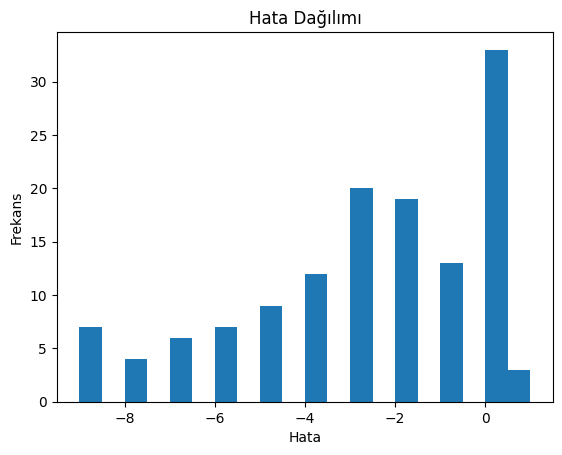

In [ ]:
error = y_test - y_pred
plt.hist(error, bins=20)
plt.xlabel("Hata")
plt.ylabel("Frekans")
plt.title("Hata Dağılımı")
plt.show()

2/2 [==============================] - 0s 7ms/step


2/2 [==============================] - 0s 9ms/step


2/2 [==============================] - 0s 8ms/step


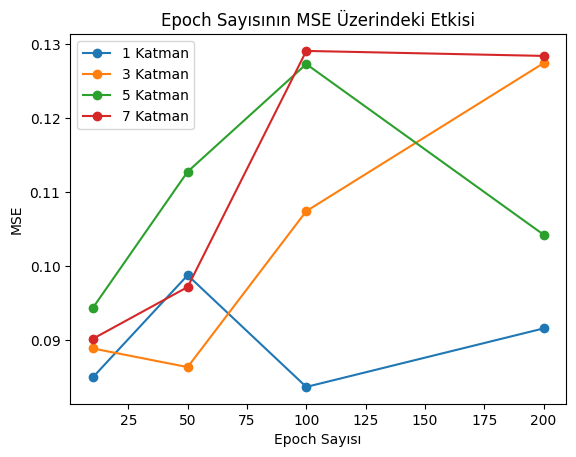

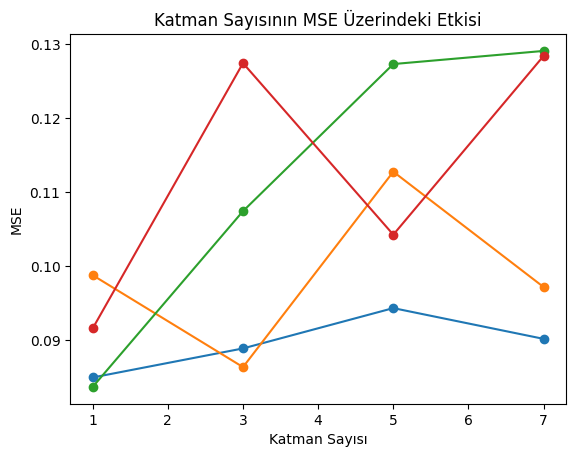

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Örnek veri setini oluşturun (örnek amaçlı)
X_train = np.random.rand(100, 10)
y_train = np.random.rand(100)
X_test = np.random.rand(50, 10)
y_test = np.random.rand(50)

# Katman sayılarını ve epoch değerlerini belirleyin
layer_sizes = [1, 3, 5, 7]
epoch_values = [10, 50, 100, 200,]
mse_scores = []

# Her katman sayısı ve epoch değeri için model oluşturup eğitim ve performans değerlendirmesi yapın
for num_layers in layer_sizes:
    mse_scores_for_layers = []
    for num_epochs in epoch_values:
        model = Sequential()
        for i in range(num_layers):
            model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
        model.add(Dense(1, activation='linear'))
        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(X_train, y_train, epochs=num_epochs, batch_size=32, verbose=0)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_scores_for_layers.append(mse)
    mse_scores.append(mse_scores_for_layers)

# Epoch Sayısının MSE Üzerindeki Etkisi
for i, mse_scores_for_layers in enumerate(mse_scores):
    plt.plot(epoch_values, mse_scores_for_layers, marker='o', label=f'{layer_sizes[i]} Katman')
plt.xlabel('Epoch Sayısı')
plt.ylabel('MSE')
plt.title('Epoch Sayısının MSE Üzerindeki Etkisi')
plt.legend()
plt.show()


# Katman Sayısının MSE Üzerindeki Etkisi
plt.plot(layer_sizes, mse_scores, marker='o')
plt.xlabel('Katman Sayısı')
plt.ylabel('MSE')
plt.title('Katman Sayısının MSE Üzerindeki Etkisi')
plt.show()
